## Detecção de Anomalias: Fraudes nas transações com cartão de crédito

![dados](img/card.png)
Photo by <a href="https://unsplash.com/@alesnesetril?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Ales Nesetril</a> & <a href="https://unsplash.com/@fabiolucas_foto?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Fábio Lucas</a> on <a href="https://unsplash.com/s/photos/credit-card?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a> (Edited)
  

## Importação dos pacotes necessários

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report, plot_confusion_matrix, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

## Carga dos dados

Dataset: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [ ]:
df = pd.read_csv("data/creditcard.csv")
print("Dataset shape:", df.shape,"\n")
print("Dataset sample:")
df.head(3)

Dataset shape: (284807, 31) 

Dataset sample:


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

## Análise Exploratória dos Dados

In [ ]:
# Valores faltantes e registros duplicados
print("There are missing values:", df.isna().any().any())
print("There are duplicated rows:", df.duplicated().any(), "(",df.duplicated().sum(),")")

There are missing values: False
There are duplicated rows: True ( 1081 )


In [ ]:
# Remoção dos registros duplicados
df.drop_duplicates(inplace=True)
print("Shape after drop duplicates:", df.shape)

Shape after drop duplicates: (283726, 31)


In [ ]:
# Tipos de dados
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Descrição estatística dos dados
df.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V21            V22  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean       -0.000854      -0.001596  ...      -0.000371      -0.000015   
std         1.179054       1.095492  ...       0.723909       0.724550   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.208828      -0.644221  ...      -0.228305      -0.542700   
50%         0.021898      -0.052596  ...      -0.029441       0.006675   
75%         0.325704       0.595977  ...       0.186194       0.528245   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000198       0.000214      -0.000232       0.000149   
std         0.623702       0.605627       0.521220       0.482053   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.161703      -0.354453      -0.317485      -0.326763   
50%        -0.011159       0.041016       0.016278      -0.052172   
75%         0.147748       0.439738       0.350667       0.240261   
max        22.528412       4.584549       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.001763       0.000547      88.472687       0.001667  
std         0.395744       0.328027     250.399437       0.040796  
min       -22.565679     -15.430084       0.000000       0.000000  
25%        -0.070641      -0.052818       5.600000       0.000000  
50%         0.001479       0.011288      22.000000       0.000000  
75%         0.091208       0.078276      77.510000       0.000000  
max        31.612198      33.847808   25691.160000       1.000000  

[8 rows x 31 columns]

### Variável AMOUNT

In [ ]:
# Estatística básica da variável Amount
df_stats = pd.DataFrame(
    {
        "Stats": df.Amount.describe()[[1,2,3,6,7]].keys(),
        "Values": df.Amount.describe()[[1,2,3,6,7]].values,
    })
df_stats

Stats        Values
0  mean     88.472687
1   std    250.399437
2   min      0.000000
3   75%     77.510000
4   max  25691.160000

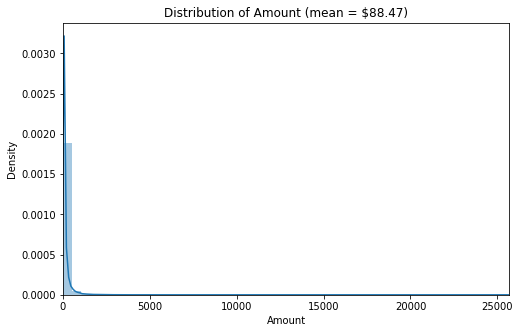

In [ ]:
# Distribuição de frequencia da variável Amount
plt.figure(figsize=(8,5))
sns.distplot(df.Amount)
plt.xlim([min(df.Amount), max(df.Amount)])
plt.title(f"Distribution of Amount (mean = ${df.Amount.mean().round(2)})")
plt.show()

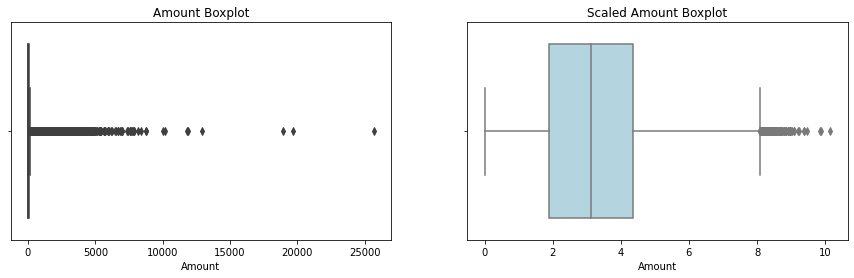

In [ ]:
# Plotagem estatística da variável Amount original e padronizada (scaled)
fig, ax = plt.subplots(1, 2, figsize=(15,4))

sns.boxplot(df.Amount, ax=ax[0])
ax[0].set_title("Amount Boxplot")

sns.boxplot(np.log1p(df.Amount), ax=ax[1], color="lightblue")
ax[1].set_title("Scaled Amount Boxplot")
plt.show()

In [ ]:
# Padronização das variáveis Amount & Time
amount = (df.Amount - df.Amount.mean()) / df.Amount.std()
time = (df.Time - df.Time.mean()) / df.Time.std() 
df["Amount"] = amount
df["Time"] = time

### Variável CLASS (nosso target)

Os dados estão desbalanceados.

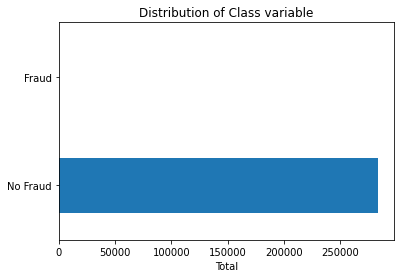

No Fraud    99.83329
Fraud        0.16671
Name: Class, dtype: float64


In [ ]:
# Plotagem da quantidade de valores distintos da variável Class
df.Class.map({1: "Fraud", 0: "No Fraud"}).value_counts().plot.barh()
plt.title("Distribution of Class variable")
plt.xlabel("Total")
plt.show()

# Mostra do percentual de cada valor distinto da variável Class
class_perc = df.Class.map({1: "Fraud", 0: "No Fraud"}).value_counts() / df.Class.count() * 100
print(class_perc)

## Separação em dados de treino (para balanceamento) e teste.

In [ ]:
# Separação das variáveis independentes (x) e dependente (y)
x = df.drop("Class", axis=1)
y = df["Class"]

# Separação em dados de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=.20)

### Balanceamento dos dados de treino

In [ ]:
smote = SMOTE(random_state=0)
X, Y = smote.fit_resample(X_train, y_train)

453188 rows



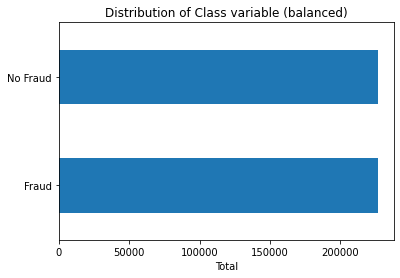

In [ ]:
# Quantidade de linhas após balanceamento
print(Y.count(), "rows\n")

# Plotagem dos dados de treino balanceados
Y.replace(0, "No Fraud").replace(1, "Fraud").value_counts().plot.barh()
plt.title("Distribution of Class variable (balanced)")
plt.xlabel("Total")
plt.show()

## Correlação entre variáveis

In [ ]:
# Embaralhamento (shuffle) dos dados
df_sample = df.sample(frac=1)

# Conjunto de dados de "fraude"
df_fraud = df_sample[df_sample.Class == 1]

# Conjunto de dados de "não fraude" com a mesma quantidade do de "fraude"
df_no_fraud = df_sample[df_sample.Class == 0][:df_fraud.shape[0]]

# Concatenação dos conjuntos de dados e shuffle
df_sample = pd.concat([df_fraud, df_no_fraud])
df_sample = df_sample.sample(frac=1, random_state=0)

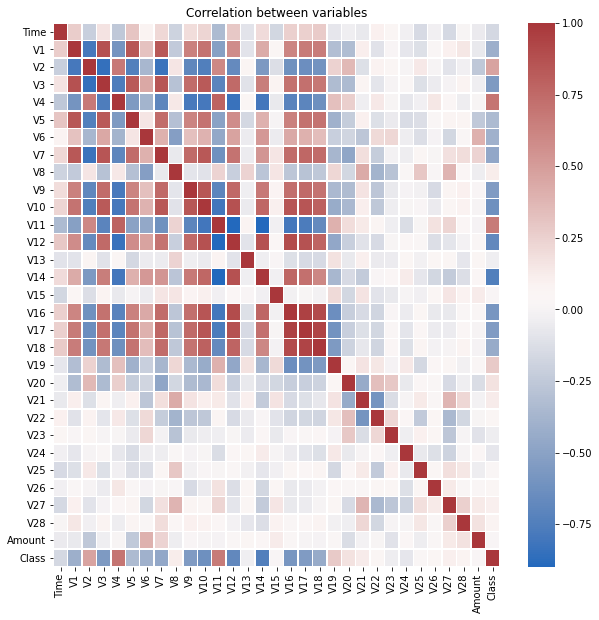

In [ ]:
# Plotagem da correlação
plt.figure(figsize=(10,10))
sns.heatmap(df_sample.corr(), cmap='vlag',linewidths=.5,annot=False)
plt.title("Correlation between variables")
plt.show()

## Plotagem estatística de algumas variáveis da amostra de dados

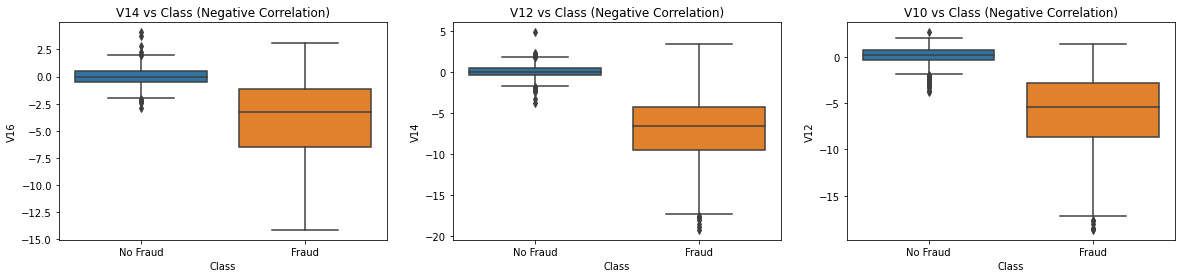

In [ ]:
# Mapeamento dos valores alvo
df_sample.Class = df_sample.Class.map({0: "No Fraud", 1:"Fraud"})

# Plotagem dos valores com correlação negativa com a variável Class
# (Quanto menor o valor, maior é a probabilidade da transação ser fraudulenta)
f, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="Class", y="V16", data=df_sample,ax=axes[0])
axes[0].set_title('V14 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V14", data=df_sample, ax=axes[1])
axes[1].set_title('V12 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V12", data=df_sample, ax=axes[2])
axes[2].set_title('V10 vs Class (Negative Correlation)')

plt.show()

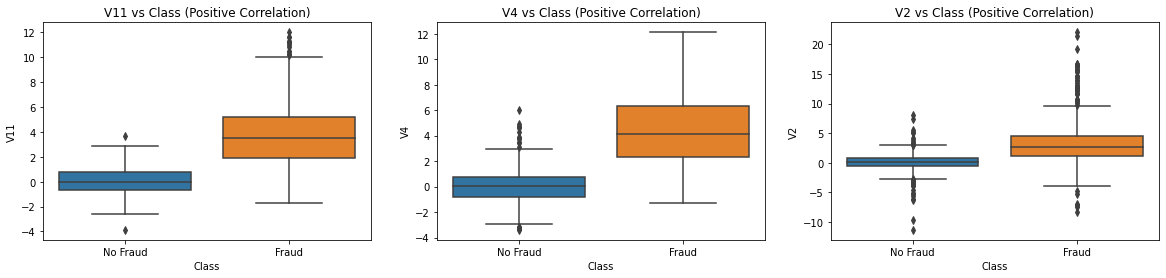

In [ ]:
# Plotagem dos valores com correlação positiva com a variável Class
# (Quanto maior o valor, maior é a probabilidade da transação ser fraudulenta)
f, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=df_sample, ax=axes[0])
axes[0].set_title('V11 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V4", data=df_sample, ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V2", data=df_sample, ax=axes[2])
axes[2].set_title('V2 vs Class (Positive Correlation)')

plt.show()

## Modelagem preditiva

### Logistic Regression

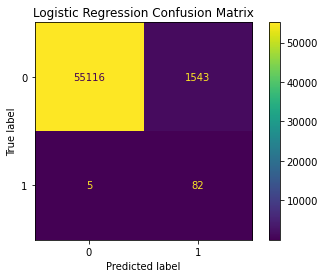


Accuracy Score: 0.973

AUC: 0.958

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56659
           1       0.05      0.94      0.10        87

    accuracy                           0.97     56746
   macro avg       0.53      0.96      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [ ]:
# Treinamento e predições
lr = LogisticRegressionCV(cv=3, random_state=0)
lr.fit(X,Y)
lr_prediction = lr.predict(X_test)

# Métricas de avaliação
lr_acc = accuracy_score(y_test, lr_prediction).round(3)
lr_report = classification_report(y_test, lr_prediction)
lr_auc = roc_auc_score(y_test, lr_prediction).round(3)
lr_precision = precision_score(y_test, lr_prediction).round(3)
lr_recall = recall_score(y_test, lr_prediction).round(3)
lr_f1 = f1_score(y_test, lr_prediction).round(3)

# Confusion Matrix e print de métricas
plot_confusion_matrix(lr, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print(f"\nAccuracy Score: {lr_acc}")
print(f"\nAUC: {lr_auc}")
print(f"\nClassification Report:\n{lr_report}")

### Decision Tree

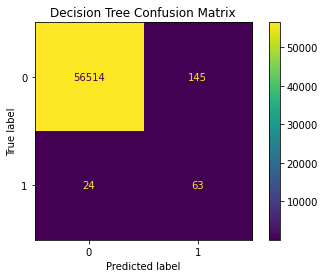


Accuracy Score: 0.997

AUC: 0.861

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.30      0.72      0.43        87

    accuracy                           1.00     56746
   macro avg       0.65      0.86      0.71     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Treinamento e predições
dt = DecisionTreeClassifier()
dt.fit(X, Y)
dt_prediction = dt.predict(X_test)

# Métricas de avaliação
dt_acc = accuracy_score(y_test, dt_prediction).round(3)
dt_report = classification_report(y_test, dt_prediction)
dt_auc = roc_auc_score(y_test, dt_prediction).round(3)
dt_precision = precision_score(y_test, dt_prediction).round(3)
dt_recall = recall_score(y_test, dt_prediction).round(3)
dt_f1 = f1_score(y_test, dt_prediction).round(3)

# Confusion Matrix e print de métricas
plot_confusion_matrix(dt, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

print(f"\nAccuracy Score: {dt_acc}")
print(f"\nAUC: {dt_auc}")
print(f"\nClassification Report : \n{dt_report}")

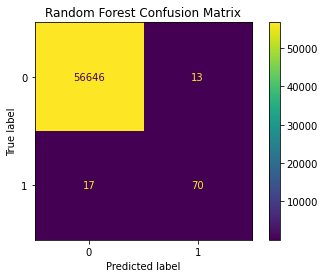


Accuracy Score: 0.999

AUC: 0.902

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.84      0.80      0.82        87

    accuracy                           1.00     56746
   macro avg       0.92      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Treinamento e predições
rf = RandomForestClassifier()
rf.fit(X, Y)
rf_prediction = rf.predict(X_test)

# Métricas de avaliação
rf_acc = accuracy_score(y_test, rf_prediction).round(3)
rf_report = classification_report(y_test, rf_prediction)
rf_auc = roc_auc_score(y_test, rf_prediction).round(3)
rf_precision = precision_score(y_test, rf_prediction).round(3)
rf_recall = recall_score(y_test, rf_prediction).round(3)
rf_f1 = f1_score(y_test, rf_prediction).round(3)

# Confusion Matrix e print de métricas
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

print(f"\nAccuracy Score: {rf_acc}")
print(f"\nAUC: {rf_auc}")
print(f"\nClassification Report: \n{rf_report}")

In [ ]:
# Sumário de métricas

pd.DataFrame(
    {
        "Model": ["Log_Regression", "Decision_Tree", "Random_Forest"],
        "AUC": [lr_auc, dt_auc, rf_auc],
        "Accuracy": [lr_acc, dt_acc, rf_acc],
        "Precision": [lr_precision, dt_precision, rf_precision],
        "Recall": [lr_recall, dt_recall, rf_recall],
        "F1_Score": [lr_f1, dt_f1, rf_f1]
    }
)

Model    AUC  Accuracy  Precision  Recall  F1_Score
0  Log_Regression  0.958     0.973      0.050   0.943     0.096
1   Decision_Tree  0.861     0.997      0.303   0.724     0.427
2   Random_Forest  0.902     0.999      0.843   0.805     0.824